# Minimal neural network implementation

This is a "bare bones" implementation of a 2-layer neural network for classification, using rectified linear units as activation functions. The code is from Andrej Karpathy; please see [this page](http://cs231n.github.io/neural-networks-case-study/) for an annotated description of the code.

In assignment 7 you will extend this and experiment with some different settings of the parameters.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['axes.facecolor'] = 'lightgray'


(-1.5, 1.5)

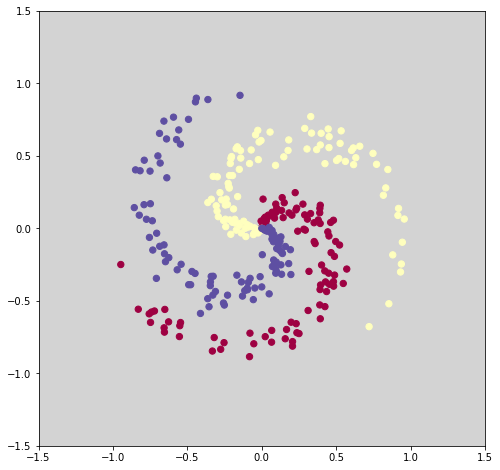

In [2]:
np.random.seed(0)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.3 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
fig = plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])


In [3]:

def train_linear_classifier():

    # initialize parameters randomly
    W = 0.01 * np.random.randn(D,K)
    b = np.zeros((1,K))

    # some hyperparameters
    step_size = 1e-0

    # gradient descent loop
    num_examples = X.shape[0]
    for i in range(200):
  
      # evaluate class scores, [N x K]
      scores = np.dot(X, W) + b 
  
      # compute the class probabilities
      exp_scores = np.exp(scores)
      probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
      # compute the loss
      correct_logprobs = -np.log(probs[range(num_examples),y])
      loss = np.sum(correct_logprobs)/num_examples
      if i % 10 == 0:
        print("iteration %d: loss %f" % (i, loss))
  
      # compute the gradient on scores
      dscores = np.array(probs)
      dscores[range(num_examples),y] -= 1
      dscores /= num_examples
  
      # backpropate the gradient to the parameters (W,b)
      dW = np.dot(X.T, dscores)
      db = np.sum(dscores, axis=0, keepdims=True)
  
      # perform a parameter update
      W += -step_size * dW
      b += -step_size * db
    
    return W, b

W, b = train_linear_classifier()

iteration 0: loss 1.096994
iteration 10: loss 0.930267
iteration 20: loss 0.869193
iteration 30: loss 0.842350
iteration 40: loss 0.828929
iteration 50: loss 0.821610
iteration 60: loss 0.817367
iteration 70: loss 0.814798
iteration 80: loss 0.813189
iteration 90: loss 0.812155
iteration 100: loss 0.811478
iteration 110: loss 0.811027
iteration 120: loss 0.810723
iteration 130: loss 0.810516
iteration 140: loss 0.810374
iteration 150: loss 0.810275
iteration 160: loss 0.810206
iteration 170: loss 0.810158
iteration 180: loss 0.810124
iteration 190: loss 0.810101


In [4]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.49


(-1.3850693285424291, 1.4049306714575527)

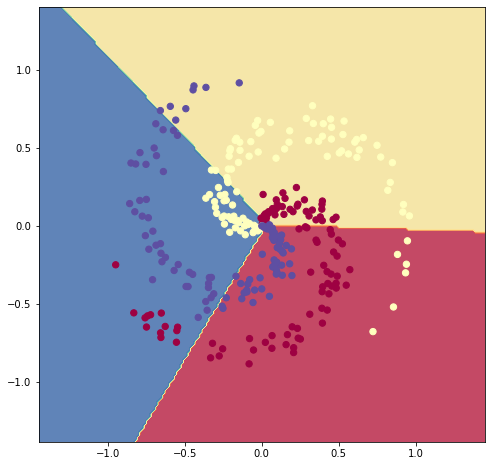

In [5]:
# plot the resulting classifier
h = 0.015
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure(figsize=(8,8))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


iteration 0: loss 1.100465
iteration 1000: loss 0.779730
iteration 2000: loss 0.716079
iteration 3000: loss 0.489153
iteration 4000: loss 0.284817
iteration 5000: loss 0.217176
iteration 6000: loss 0.178866
iteration 7000: loss 0.151427
iteration 8000: loss 0.129469
iteration 9000: loss 0.111706
iteration 10000: loss 0.097544
iteration 11000: loss 0.086496
iteration 12000: loss 0.078005
iteration 13000: loss 0.071441
iteration 14000: loss 0.066262
iteration 15000: loss 0.062072
iteration 16000: loss 0.058603
iteration 17000: loss 0.055671
iteration 18000: loss 0.053151
iteration 19000: loss 0.050956
iteration 20000: loss 0.049021
iteration 21000: loss 0.047299
iteration 22000: loss 0.045755
iteration 23000: loss 0.044361
iteration 24000: loss 0.043095
iteration 25000: loss 0.041939
iteration 26000: loss 0.040880
iteration 27000: loss 0.039905
iteration 28000: loss 0.039005
iteration 29000: loss 0.038171


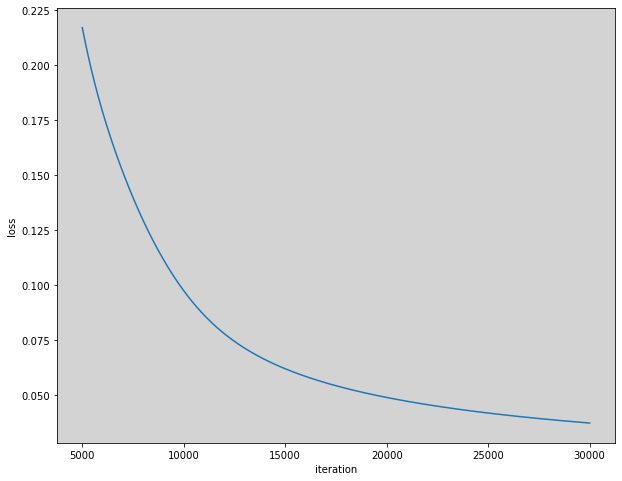

In [6]:
def relu(x):
    return x*(x>0)

activation = np.tanh

def train_2_layer_network(H1=100, steps=20000, step_size=1e-1):
    # initialize parameters randomly
    # H1 = 100 # size of hidden layer
    W1 = 0.1 * np.random.randn(D,H1)
    b1 = np.zeros((1,H1))
    W2 = 0.1 * np.random.randn(H1,K)
    b2 = np.zeros((1,K))

    loss = []

    # gradient descent loop
    num_examples = X.shape[0]
    for i in np.arange(steps):
  
      # evaluate class scores, [N x K]
      hidden_layer = activation(np.dot(X, W1) + b1) # note, ReLU activation
      scores = np.dot(hidden_layer, W2) + b2
  
      # compute the class probabilities
      exp_scores = np.exp(scores)
      probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
      # compute the loss
      correct_logprobs = -np.log(probs[range(num_examples),y])
      current_loss = np.sum(correct_logprobs)/num_examples
      loss.append(current_loss)
        
      if i % 1000 == 0:
        print("iteration %d: loss %f" % (i, current_loss))
  
      # compute the gradient on scores
      dscores = np.array(probs)
      dscores[range(num_examples),y] -= 1
      dscores /= num_examples
  
      # backpropate the gradient to the parameters
      # first backprop into parameters W2 and b2
      dW2 = np.dot(hidden_layer.T, dscores)
      db2 = np.sum(dscores, axis=0, keepdims=True)
        
      # next backprop into hidden layer
      dhidden = np.dot(dscores, W2.T)
        
      # backprop the non-linearity
      # when the activation function changes, this has to change!
      dhidden = dhidden * (1-np.square(np.tanh(np.dot(X, W1) + b1)))
      # dhidden[hidden_layer <= 0] = 0
        
      # finally into W,b
      dW1 = np.dot(X.T, dhidden)
      db1 = np.sum(dhidden, axis=0, keepdims=True)
  
      # perform a parameter update
      W1 += -step_size * dW1
      b1 += -step_size * db1
      W2 += -step_size * dW2
      b2 += -step_size * db2

    skip = 5000
    tail_loss = loss[skip:]
    plt.plot(np.arange(len(tail_loss))+skip, tail_loss)
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    return W1, b1, W2, b2


W1, b1, W2, b2 = train_2_layer_network(10, steps=30000, step_size=1e-1)

In [7]:
# evaluate training set accuracy
hidden_layer = activation(np.dot(X, W1) + b1)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.99


(-1.8850693285424291, 1.4149306714575494)

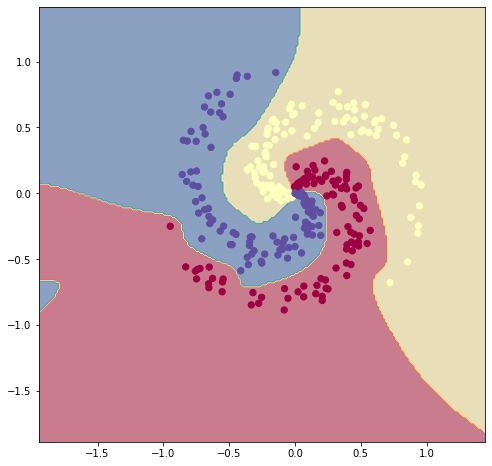

In [8]:
# plot the resulting classifier
h = 0.015
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(activation(np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure(figsize=(8,8))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
